In [1]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn import metrics
import matplotlib.pyplot as plt 

%matplotlib inline

In [2]:
countries = pd.read_csv("countries.csv")
countries.rename(columns={"name":"Country"}, inplace=True)
del countries["country"]

temp_country = pd.read_csv("GlobalLandTemperaturesByCountry.csv").merge(countries, on="Country",how="left")
temp_country.dt = pd.to_datetime(temp_country.dt)
del temp_country["AverageTemperatureUncertainty"]

temp_country.sample(5)

,dt,AverageTemperature,Country,latitude,longitude
504304,1922-10-01,19.387,Swaziland,-26.522503,31.465866
377327,1878-07-01,31.621,Niger,17.607789,8.081666
511525,1984-09-01,11.337,Switzerland,46.818188,8.227512
441136,1984-02-01,25.952,Saint Lucia,13.909444,-60.978893
46109,1892-05-01,30.097,Bahrain,25.930414,50.637772


In [3]:
temp_country_notnull =temp_country.dropna(axis=0).sort_values(by="dt", ascending=True)
porc_null_oridinal = len(temp_country_notnull)/len(temp_country)

In [4]:
country="France"

x = temp_country_notnull[temp_country_notnull["Country"]==country][["dt","AverageTemperature"]].set_index("dt")
g = x.resample("Y").mean().dropna(axis=0) # devuelve un dataframe
#g.plot(color= "red")


#Nan aletorios
df = g.copy().reset_index().dropna(axis=0)
data_null = df # Datos con nulos, se usara para validar
data_null["year"] = data_null.dt.dt.year
del data_null["dt"] 

indices = data_null.sample(frac=0.29).index
d = df.copy()
data_null.loc[indices, 'AverageTemperature'] = np.nan

data_val = d.loc[indices,:]

data = data_null.dropna(axis=0) #Data sin nulos

In [5]:
temp_country_notnull.groupby("Country").count().sort_values(by="latitude",ascending=False).head(10)

,dt,AverageTemperature,latitude,longitude
Country,,,,
Luxembourg,3166,3166,3166,3166
Serbia,3166,3166,3166,3166
Norway,3166,3166,3166,3166
Switzerland,3166,3166,3166,3166
Sweden,3166,3166,3166,3166
Iceland,3166,3166,3166,3166
Spain,3166,3166,3166,3166
Slovenia,3166,3166,3166,3166
Slovakia,3166,3166,3166,3166


# Modelo de prediccion con nulos

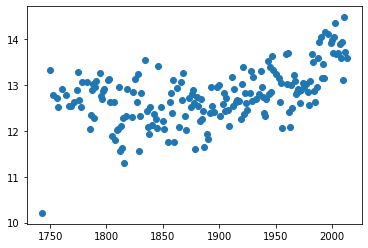

In [6]:
datos = data_null.copy()

x= datos.year.values.reshape(-1,1)
y = datos.AverageTemperature.values.reshape(-1,1)

plt.scatter(x, y)

In [7]:
#n = data[data["Country"]==country][["dt","AverageTemperature"]].set_index("dt").resample("Y").mean().dropna(axis=0).reset_index()
#n["year"] = n.dt.dt.year
#n=n.dropna(axis=0)

def regresionPol(data):
    x= data.year.values.reshape(-1,1)
    y = data.AverageTemperature.values.reshape(-1,1)
    x_train, x_test, y_train, y_test = train_test_split(x, y)

    #Se define el grado del polinomio
    poli = PolynomialFeatures(degree = 2)

    #Se transforma las caracterisitcas existentes en caractéristicas de mayor grado
    X_train_poli = poli.fit_transform(x_train)
    X_test_poli = poli.fit_transform(x_test)

    #Defir el algoritmo a utilizar
    pr = linear_model.LinearRegression()
    pr.fit(X_train_poli, y_train)
    
    return pr
    

In [10]:
regresion_notNull = regresionPol(data)
regresion_Null = regresionPol(d)

In [11]:
poli = PolynomialFeatures(degree = 2)
validar = poli.fit_transform(data_val.year.values.reshape(-1,1))

#Predicciones
data_val["NotNull"] = regresion_notNull.predict(validar)
data_val["Null"] = regresion_Null.predict(validar)
data_val.sample(5)

,AverageTemperature,year,NotNull,Null
155,12.391917,1902,12.541585,12.634290
52,11.889083,1799,12.570724,12.433203
46,12.945083,1793,12.610423,12.442560
135,12.592833,1882,12.450786,12.541760
249,13.013917,1996,13.591005,13.414441


In [12]:
print('Mean Absolute Error:', metrics.mean_absolute_error(data_val.AverageTemperature, data_val.Null))  
print('Mean Squared Error:', metrics.mean_squared_error(data_val.AverageTemperature, data_val.Null))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(data_val.AverageTemperature, data_val.Null)))
print("\n")
print('Mean Absolute Error:', metrics.mean_absolute_error(data_val.AverageTemperature, data_val.NotNull))  
print('Mean Squared Error:', metrics.mean_squared_error(data_val.AverageTemperature, data_val.NotNull))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(data_val.AverageTemperature, data_val.NotNull)))

Mean Absolute Error: 0.4639269693784893
Mean Squared Error: 0.5954607451259385
Root Mean Squared Error: 0.7716610299386244


Mean Absolute Error: 0.47852921931809916
Mean Squared Error: 0.6757878518083328
Root Mean Squared Error: 0.8220631677726066
